In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB

In [6]:
train_images = np.loadtxt('data/train_images.txt')
train_labels = np.loadtxt('data/train_labels.txt', 'int')
test_images = np.loadtxt('data/test_images.txt')
test_labels = np.loadtxt('data/test_labels.txt', 'int')

In [91]:
class KnnClassifier:
    def __init__(self, train_images, train_labels):
     self.train_images = train_images
     self.train_labels = train_labels
    
    def classify_image(self, test_image, num_neighbors = 3, metric = 'l2'): 
        if (metric == 'l2'):   
            distances = np.sqrt(np.sum((self.train_images - test_image) ** 2, axis = 1))
        else:
            distances = np.sum(abs(self.train_images - test_image), axis = 1)
        
        sort_index = np.argsort(distances)[:num_neighbors]
        nearest_labels = self.train_labels[sort_index] 
        histc = np.bincount(nearest_labels)
        
        return np.argmax(histc)

In [97]:
def accuracy(num_neighbors = 3, metric = 'l2'):
    classifier = KnnClassifier(train_images, train_labels)
    predicted_labels = [classifier.classify_image(image, num_neighbors, metric) for image in test_images]
    return np.mean(test_labels == predicted_labels)

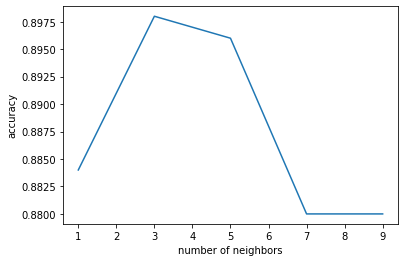

In [104]:
num_list = [1, 3, 5, 7, 9]

acc = [accuracy(num) for num in num_list]

np.savetxt('acuratete_l2.txt', acc)

plt.plot(num_list, acc)
plt.xlabel('number of neighbors')
plt.ylabel('accuracy') 
plt.show()

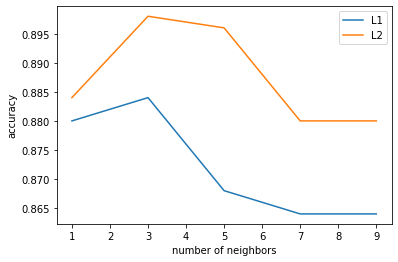

In [106]:
acc = [accuracy(num, 'l1') for num in num_list]

acc_l2 = np.loadtxt('acuratete_l2.txt')
np.savetxt('acuratete_l1.txt', acc)

plt.plot(num_list, acc)
plt.plot(num_list, acc_l2)
plt.gca().legend(('L1', 'L2'))
plt.xlabel('number of neighbors')
plt.ylabel('accuracy') 
plt.show()